# Heart Disease Exploratory Data Analysis (EDA)

## Objective
The goal of this analysis is to explore the heart disease dataset, understand the
distribution of clinical features, identify relationships with heart disease,
and extract insights that may inform predictive modeling.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set background
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df = pd.read_csv("../data/raw/heart.csv")

# Dataset Overview
This dataset contains patient-level medical attributes related to heart health.
Each row represents a patient, and the target variable indicates the presence
of heart disease.


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Data quality checks
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

No missing or duplicate values were observed, indicating that the dataset
is clean and suitable for exploratory analysis.

In [9]:
# Rename columns
column_rename_map = {
    "age": "age",
    "sex": "sex",
    "cp": "chest_pain_type",
    "trestbps": "resting_bp",
    "chol": "cholestrol",
    "fbs": "fasting_bs",
    "restecg": "rest_ecg",
    "thalach": "max_heart_rate",
    "exang": "exercise_angina",
    "oldpeak": "st_depression",
    "slope": "st_slope",
    "ca": "num_major_vessels",
    "thal": "thalassemia",
    "target": "heart_disease"
}

In [10]:
df =df.rename(columns=column_rename_map)

In [11]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestrol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Renaming

Column names were standardized using descriptive, snake_case naming conventions
to improve readability, maintainability, and clarity throughout the analysis.


In [12]:
numerical_features = ["age", "resting_bp", "cholestrol", "max_heart_rate", "st_depression"]
categorical_features = ["sex", "chest_pain_type", "fasting_bs", "rest_ecg", "exercise_angina", "st_slope", "num_major_vessels", "thalassemia", "heart_disease"]

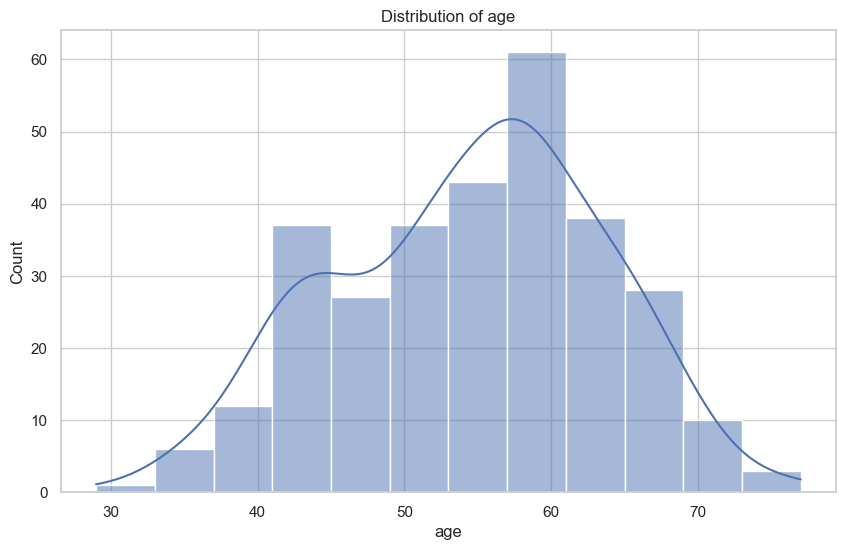

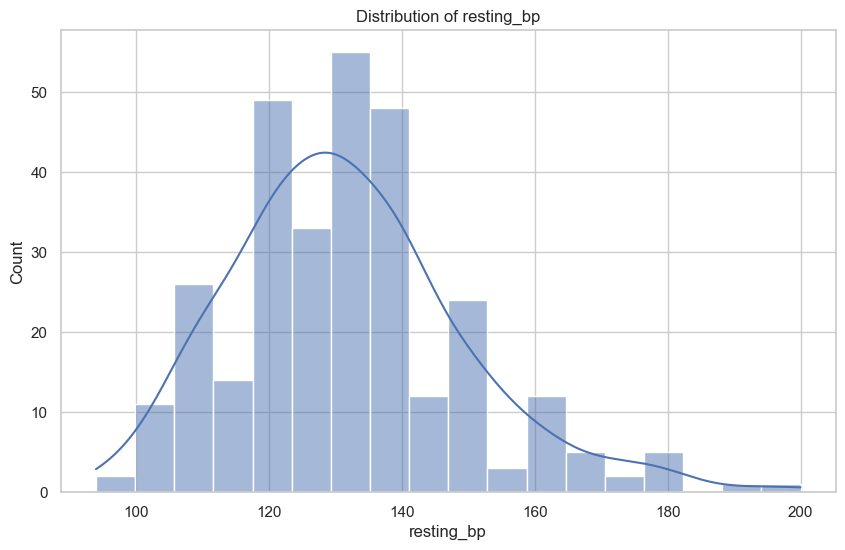

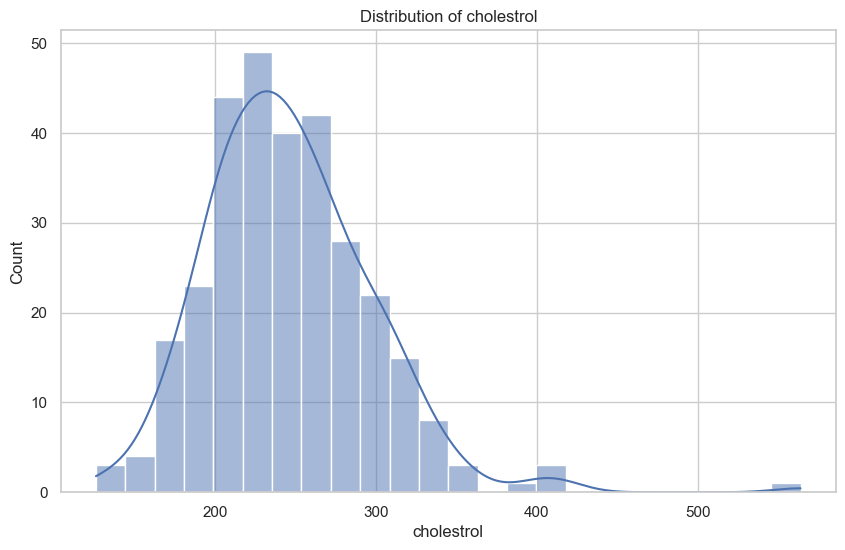

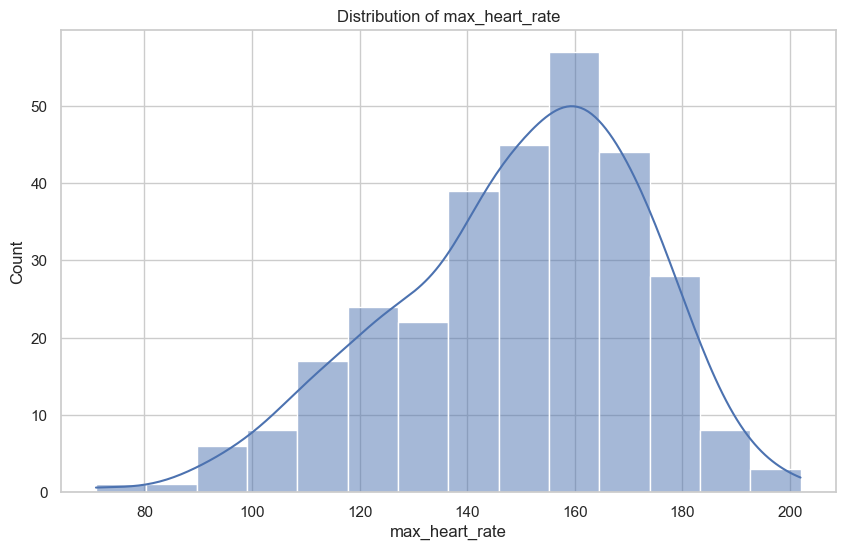

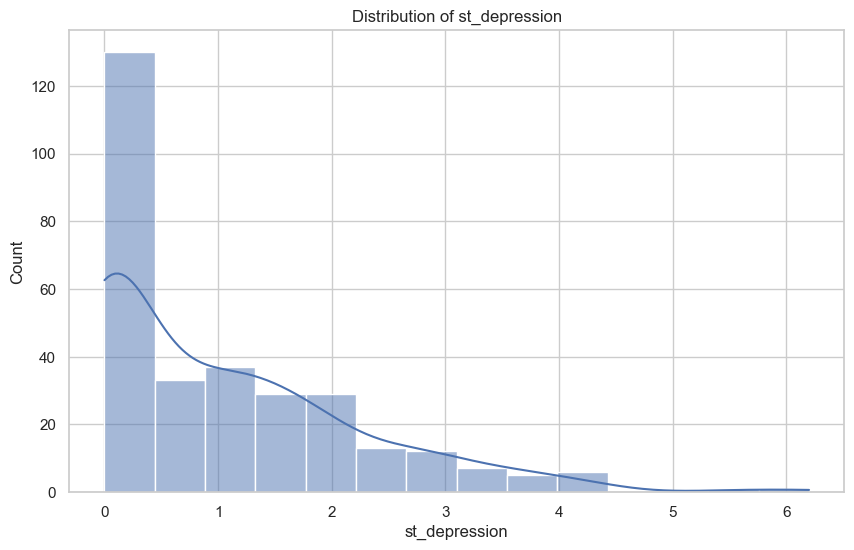

In [13]:
# UNIVARIATE ANALYSIS --Numerical Features
def plot_distribution(feature):
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

for feature in numerical_features:
    plot_distribution(feature)

- Age appears approximately normally distributed.
- Cholesterol levels show right skewness, indicating potential outliers.


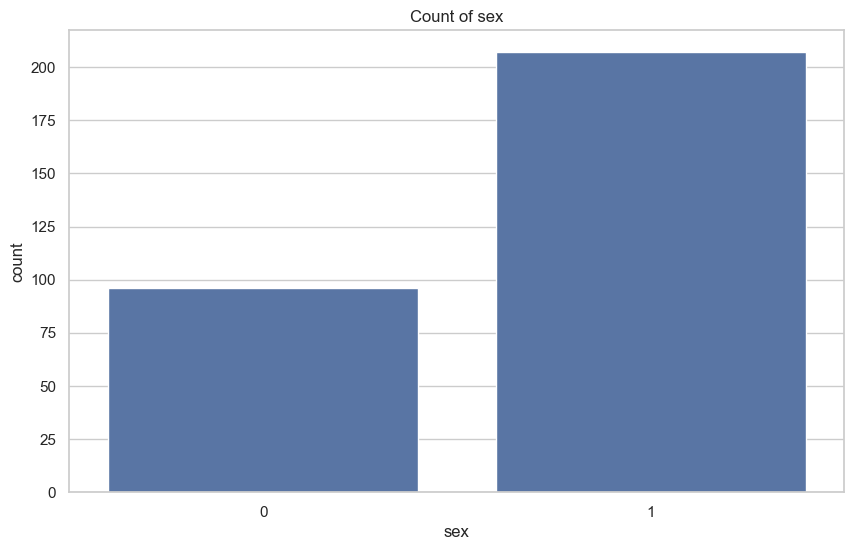

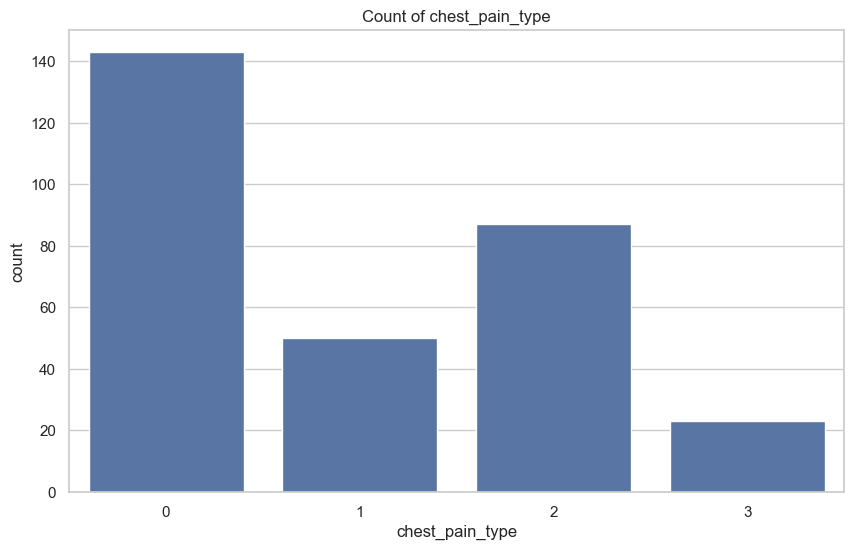

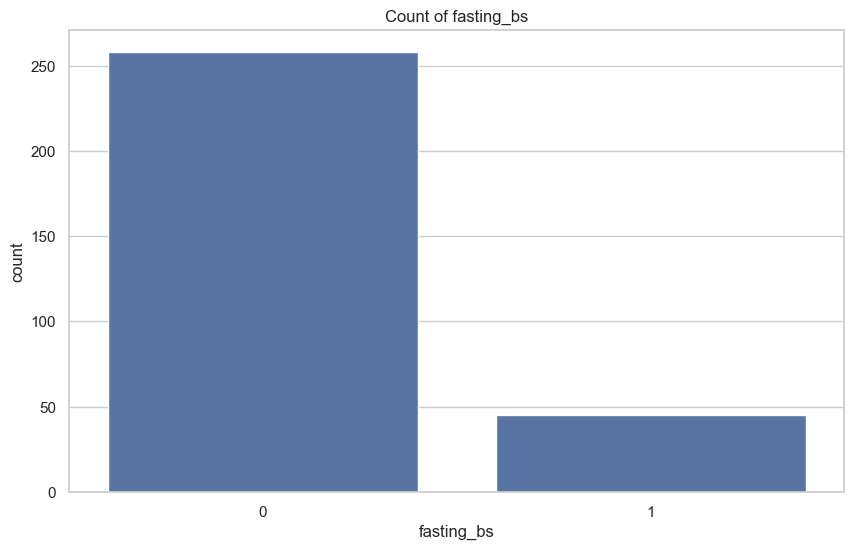

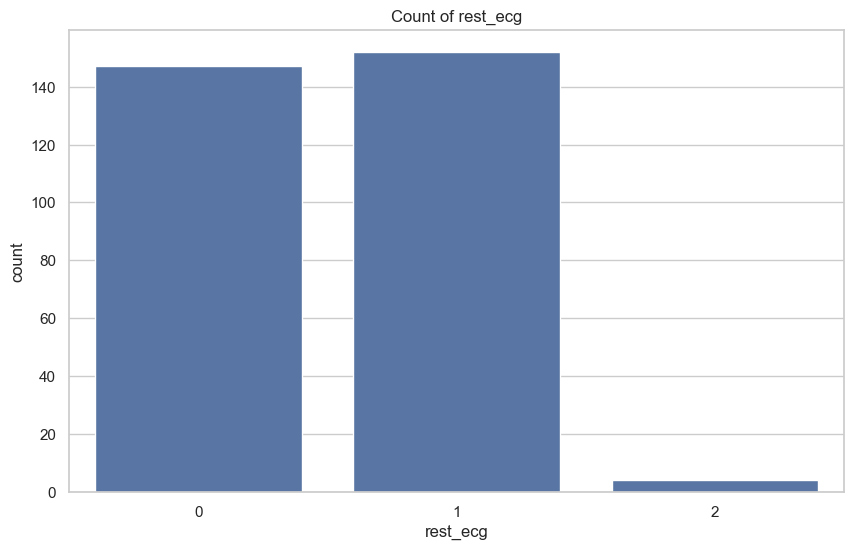

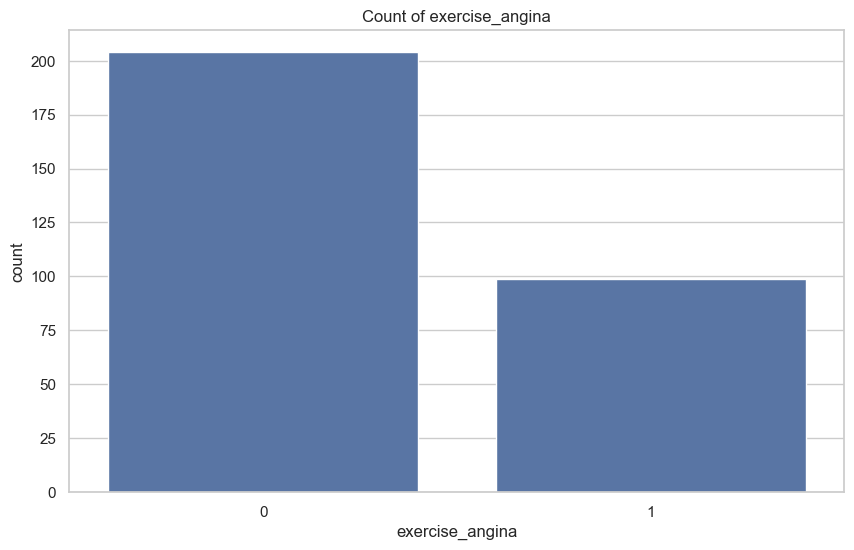

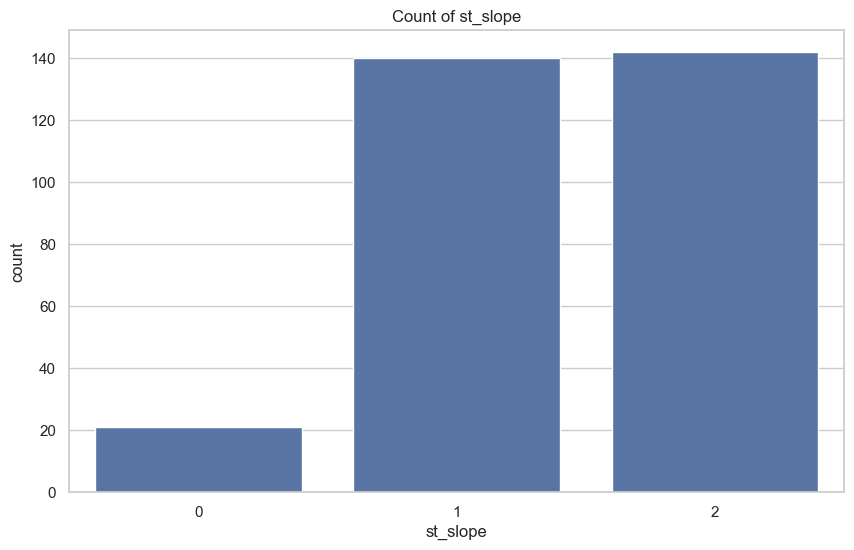

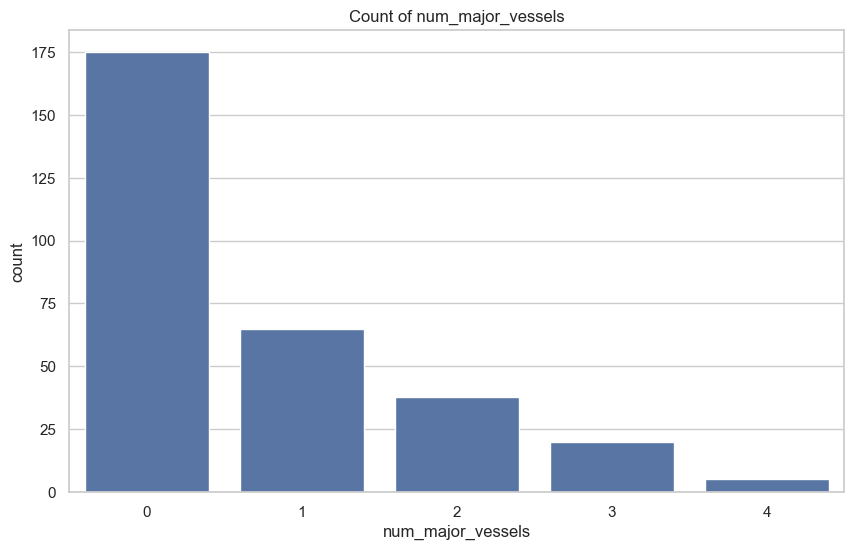

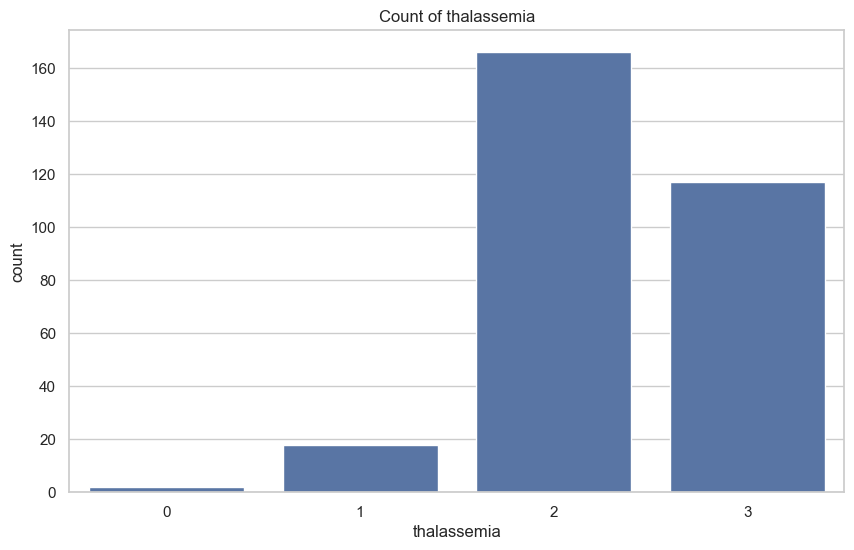

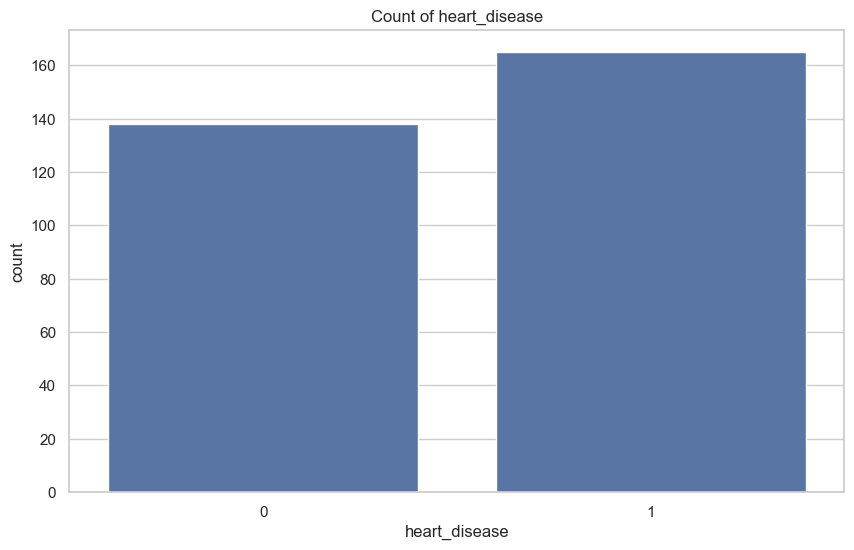

In [14]:
#Univariate Analysis – Categorical Features
def plot_counts(feature):
    sns.countplot(x = feature, data =df)
    plt.title(f"Count of {feature}")
    plt.show()

for feature in categorical_features:
    plot_counts(feature)

Most patients are male, and certain chest pain types appear more frequently
than others.


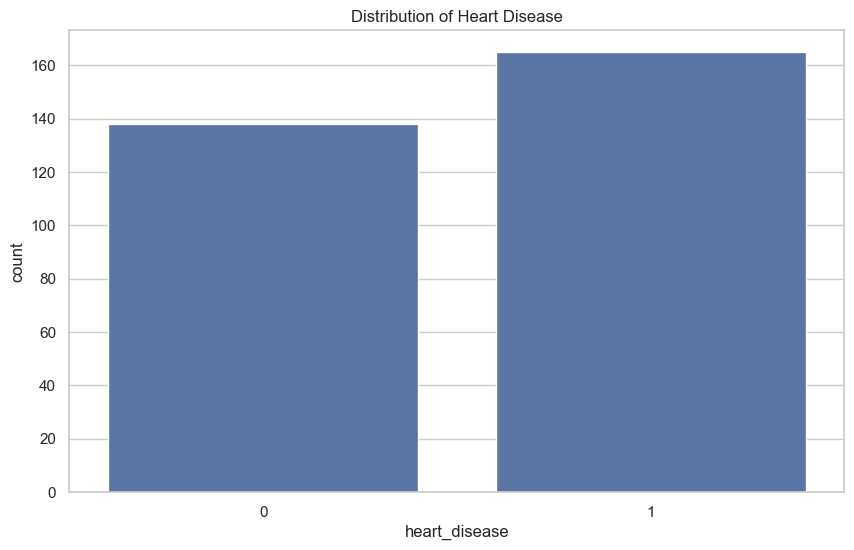

In [15]:
# Target variable analysis
sns.countplot(x = "heart_disease", data =df)
plt.title("Distribution of Heart Disease")
plt.show()

The target variable is reasonably balanced, making the dataset suitable
for classification modeling without severe class imbalance concerns.


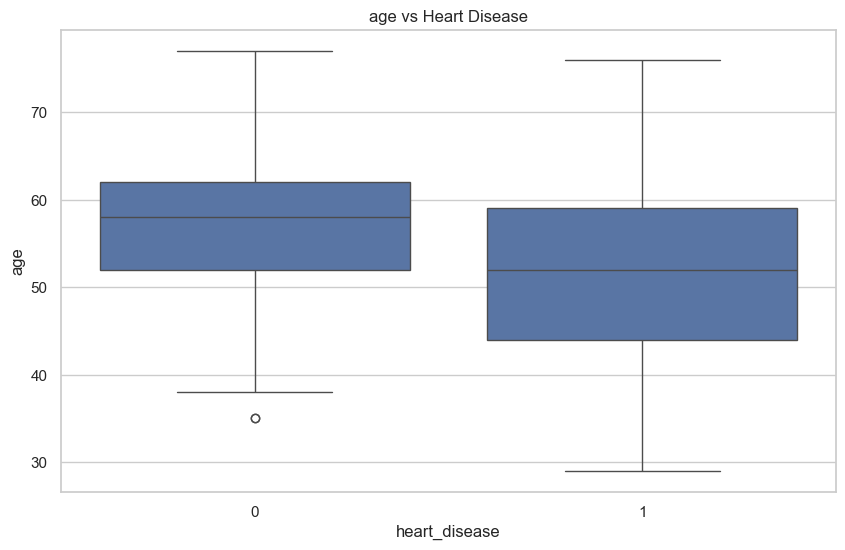

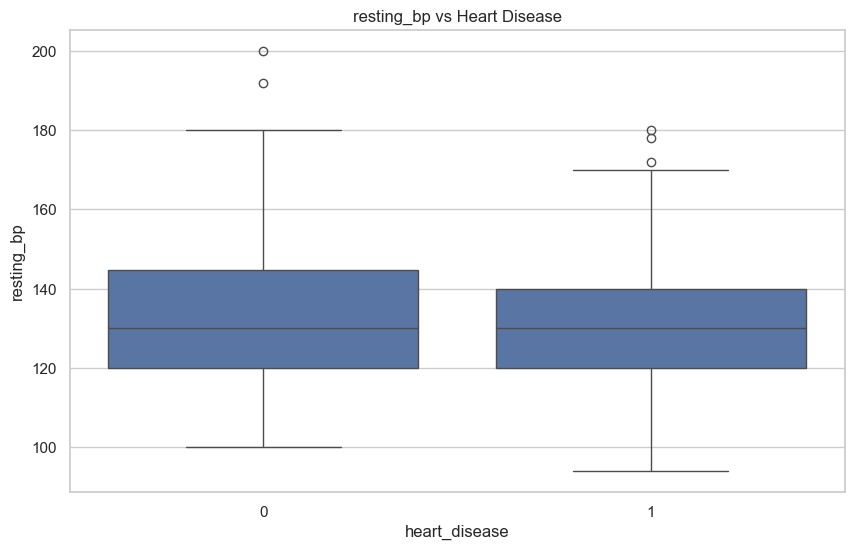

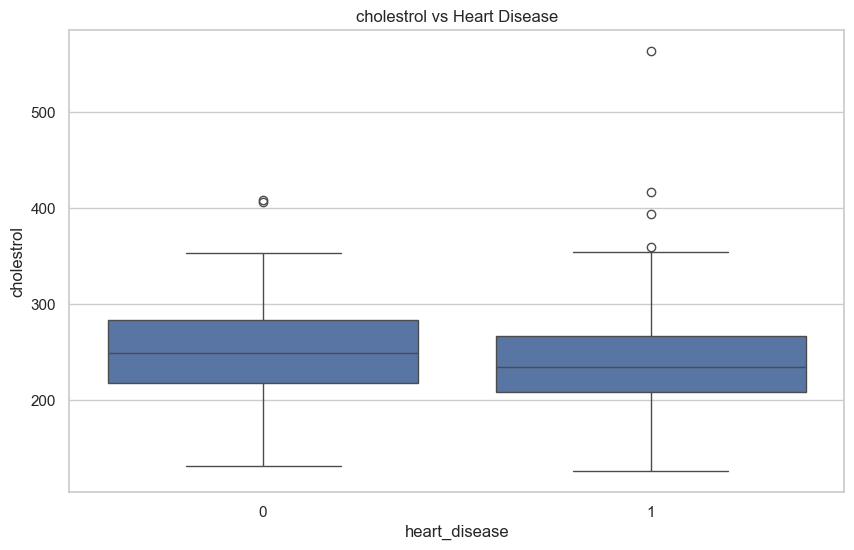

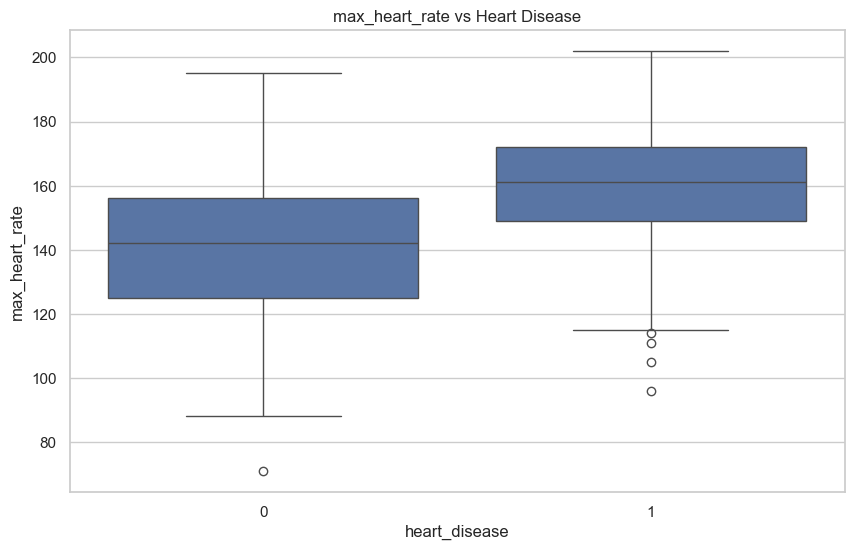

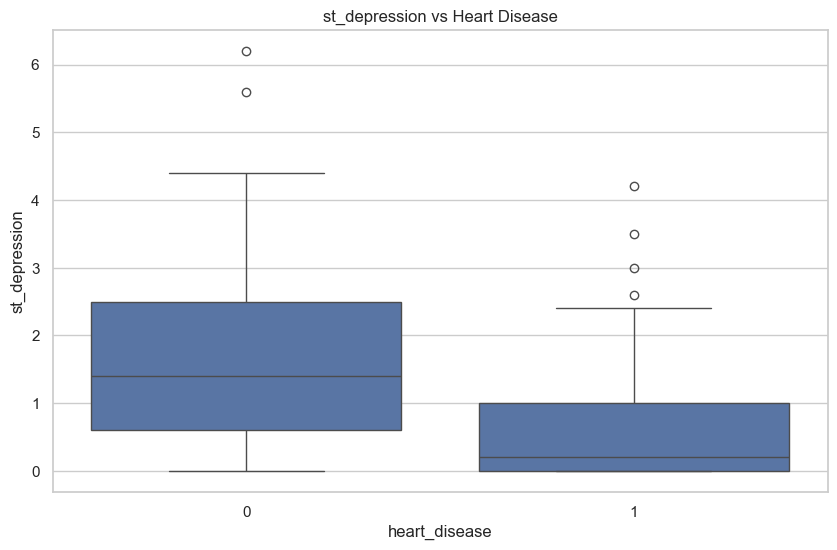

In [16]:
# Bivirate Analysis
# Numerical vs Target
for feature in numerical_features:
    sns.boxplot(x = "heart_disease", y = feature, data = df)
    plt.title(f"{feature} vs Heart Disease")
    plt.show()

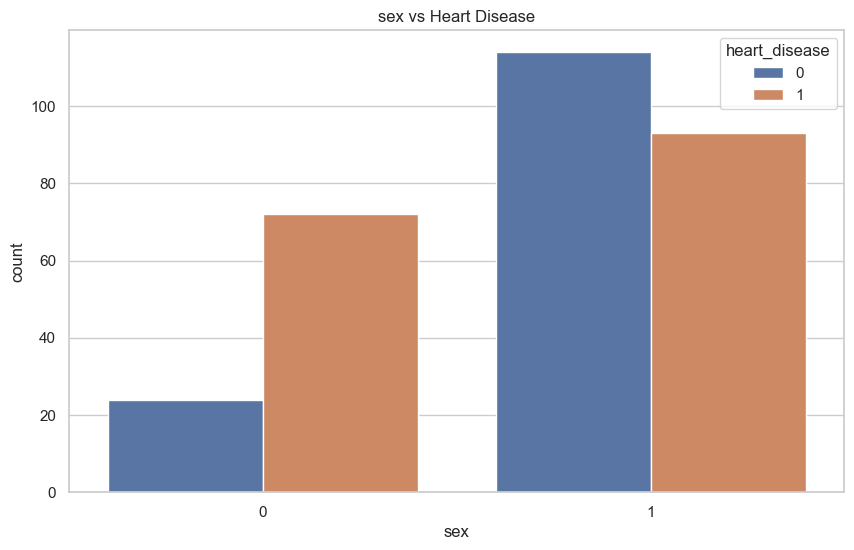

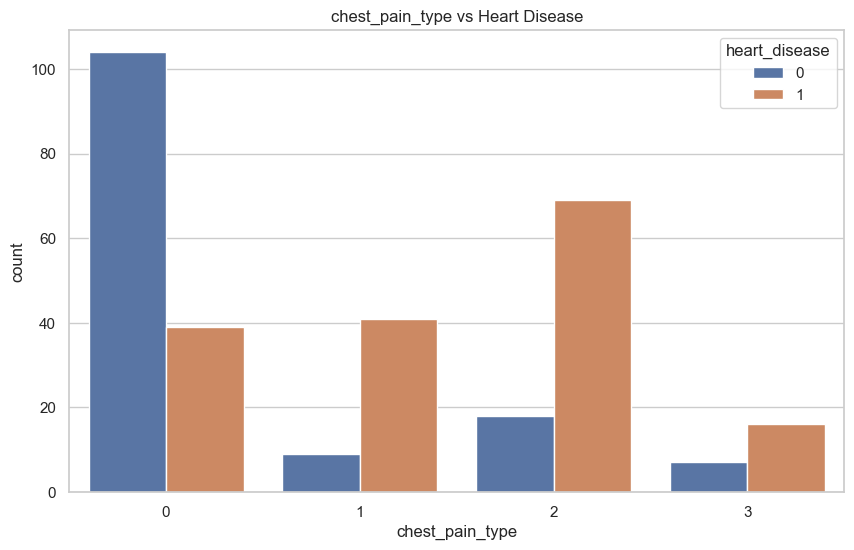

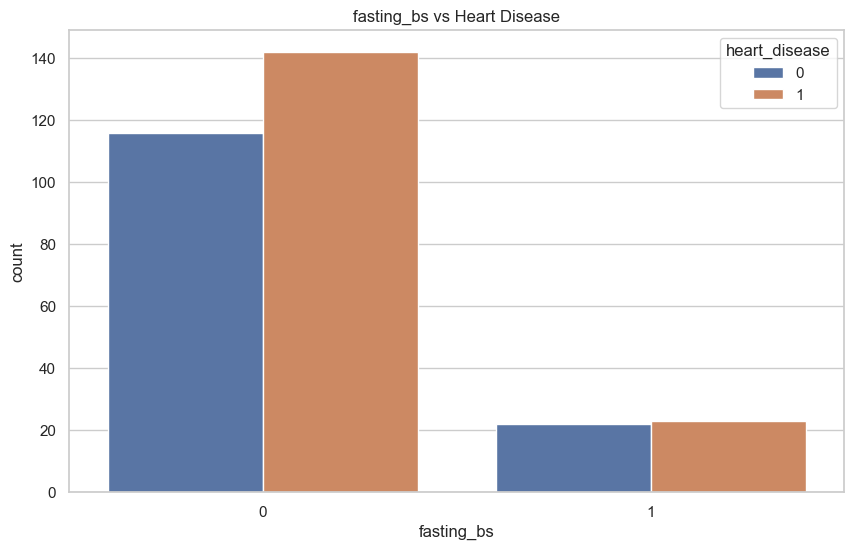

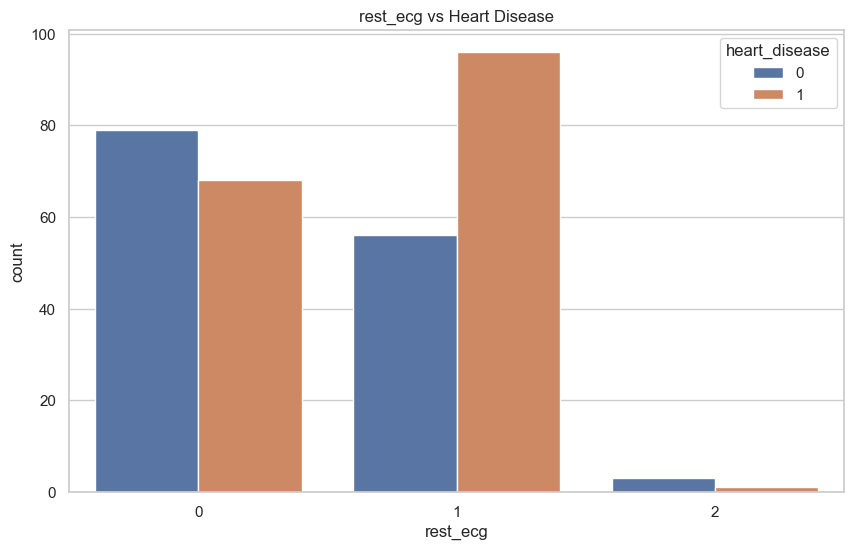

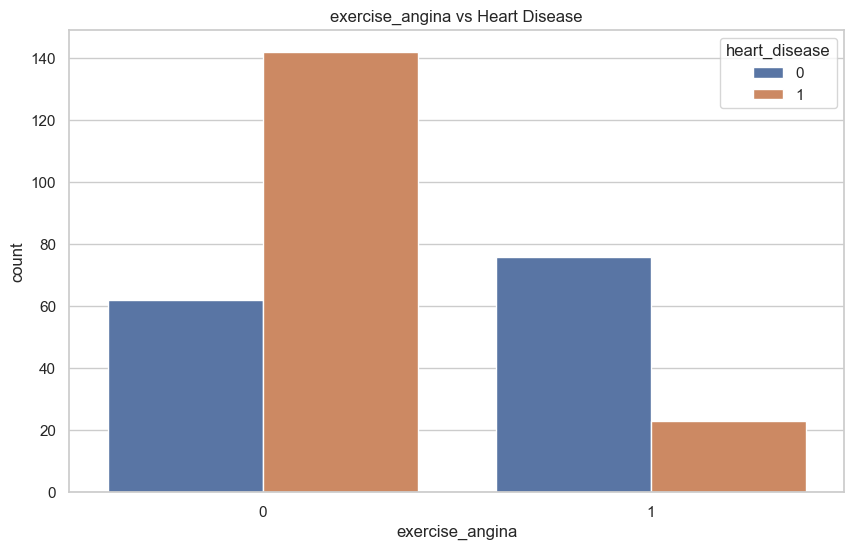

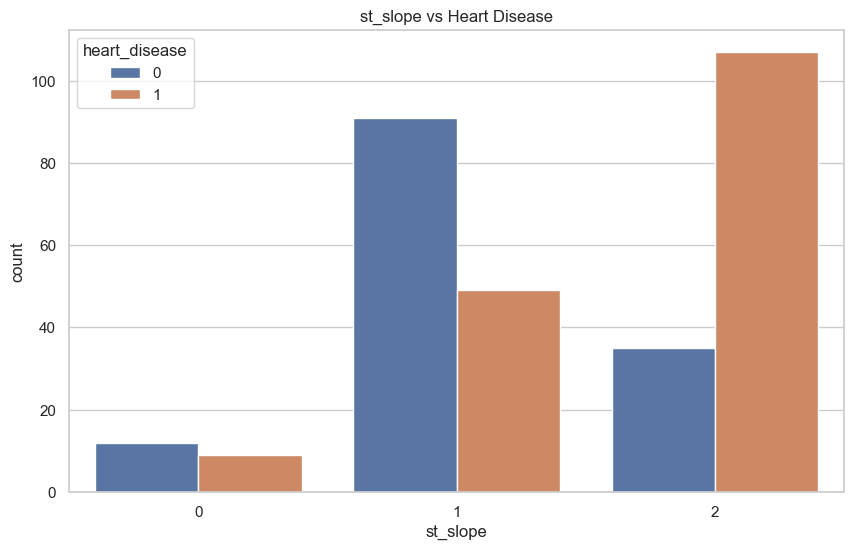

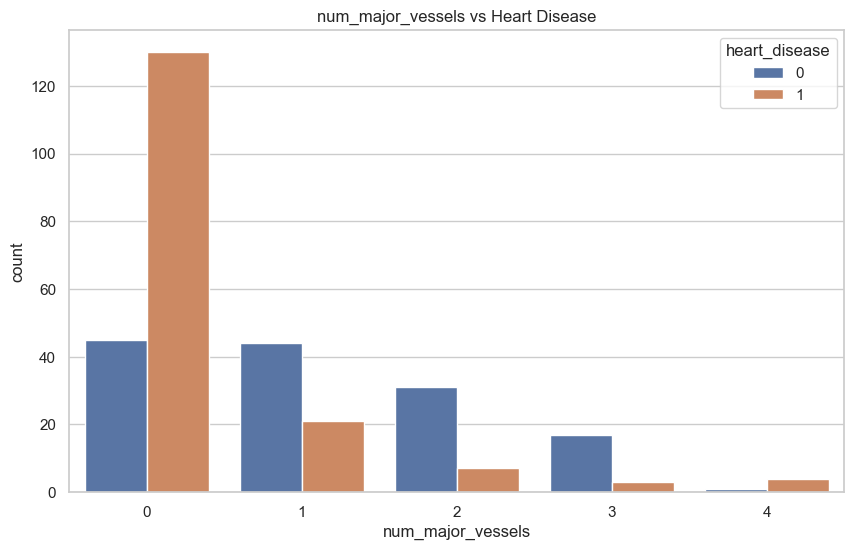

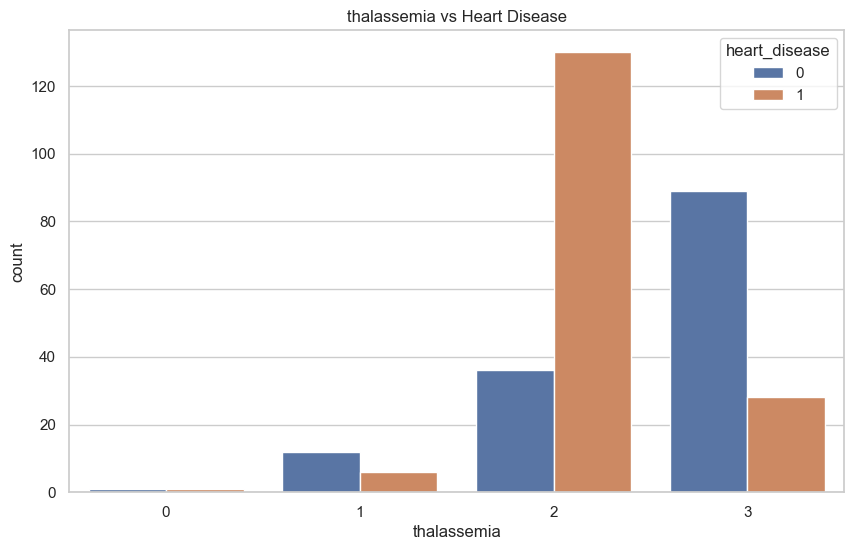

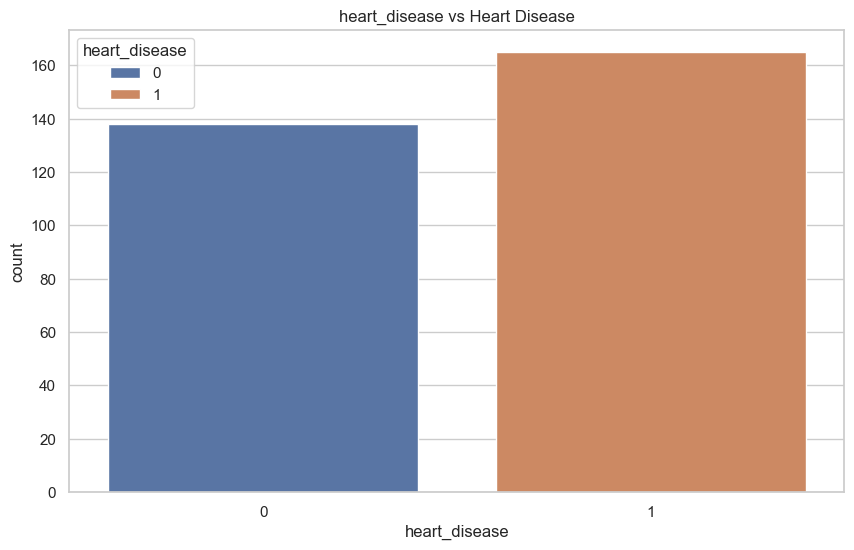

In [17]:
# catigorical vs Target
for feature in categorical_features:
    if feature != "target":
        sns.countplot(x = feature, hue="heart_disease", data=df)
        plt.title(f"{feature} vs Heart Disease")
        plt.show()

Patients with exercise-induced angina and higher ST depression (oldpeak)
show a higher likelihood of heart disease.


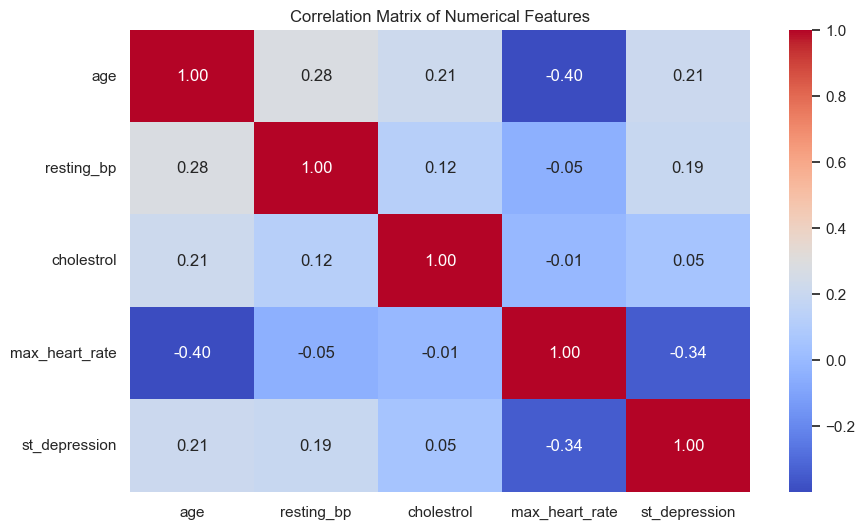

In [ ]:
#Correlation Analysis
corr = df[numerical_features].corr()
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.savefig("../reports/figures/correlation_heatmap.png", bbox_inches="tight")
plt.show()

The correlation heatmap highlights linear relationships between numerical features.
Maximum heart rate shows a negative correlation with age, while ST depression
exhibits a positive correlation with heart disease. No severe multicollinearity
is observed among the numerical features.


## Key Insights
- Chest pain type is strongly associated with heart disease presence.
- Lower maximum heart rate is linked to higher heart disease risk.
- ST depression (oldpeak) is a strong indicator of heart disease.

## Conclusion
The dataset reveals meaningful relationships between clinical features and
heart disease, providing a solid foundation for predictive modeling.
